In [12]:
#load datasets
import tensorflow as tf
import pickle5
from sklearn.datasets import load_boston
import sklearn.linear_model as sk
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
path = "/home/alexander/Downloads/" #change path 

In [15]:
myfile = path+"dataset.pickle" #load dataset
f = open(myfile, 'rb')
a = pickle5.load(f)
a

,real_rng,rng,rssi,fp_idx,fp_power,fp_amp1,fp_amp2,fp_amp3,std_noise,pacc_cnt,cir_real,cir_imag,condition,location_from,location_to,msid
0,6.269,8.874,-80.101,749,-93.925,287,1596,1881,52,101,"[-25, -35, 1, 64, -11, -146, 34, -49, -174, -1...","[15, 54, 64, -15, 34, 72, 41, -3, -33, -70, -1...",nlos,hw,hw,0
1,6.269,8.045,-80.136,743,-93.968,1404,1657,1179,36,101,"[53, -10, 114, -5, -11, 152, 155, 81, 71, -15,...","[-46, 67, -42, -24, 18, -58, -15, 64, 5, -99, ...",nlos,hw,hw,0
2,6.269,8.006,-80.202,747,-94.004,1467,1683,1035,40,101,"[44, -31, -11, -111, -16, 56, -1, -55, -30, 24...","[-43, -76, -41, -40, -96, 28, -19, 24, 85, 15,...",nlos,hw,hw,0
3,6.269,7.945,-80.082,751,-93.533,1068,1721,1627,40,101,"[-113, -27, 37, -32, 4, -30, 23, 12, 45, -38, ...","[70, 114, -56, -48, 87, 4, 44, 113, 43, -6, 81...",nlos,hw,hw,0
4,6.269,8.047,-80.166,749,-93.624,940,1595,1784,40,101,"[99, -25, -34, -18, 92, -7, -14, -65, -12, 112...","[-134, -1, 66, 23, 67, 97, -38, 11, 19, -37, 7...",nlos,hw,hw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36696,3.191,3.076,-79.575,744,-81.128,6251,6550,5954,40,101,"[52, -104, -95, -69, -34, 9, 66, -43, -193, -9...","[114, 47, 1, -34, -108, -90, 126, 94, 55, 169,...",los,til,til,748
36697,3.191,3.053,-79.866,749,-81.564,5480,6264,6079,44,101,"[42, -7, -43, 1, 70, 47, 11, 50, -33, -91, 20,...","[53, 142, 28, -76, -128, -42, 132, 50, 64, 104...",los,til,til,748
36698,3.191,3.056,-79.689,748,-81.709,6355,6225,4857,44,101,"[-74, -43, 38, 62, -3, -90, -49, -25, 39, 28, ...","[-103, -214, 34, 79, 123, 34, -101, 14, -106, ...",los,til,til,748
36699,3.191,3.067,-79.859,745,-82.538,6014,6024,3525,48,101,"[55, 120, 63, -69, -52, -74, -107, 60, 147, -1...","[-80, -58, 32, 128, 55, -5, -2, -23, 49, 131, ...",los,til,til,748


In [16]:
target = a.pop('condition')
cir_real = a.pop('cir_real')
cir_imag = a.pop('cir_imag') # load appropriate columns

In [17]:
X = np.empty(shape=[36701, 1015]) #create an empty array


In [18]:
for i in range(0,36701):
    cir_r = np.power(cir_real[i],2)
    cir_i = np.power(cir_imag[i],2)
    final = np.sqrt(cir_r + cir_i)
    final = final.reshape(-1,1015)
    X[i] =  final
X  #store cir magnitude for each sample

array([[ 29.15475947,  64.35060217,  64.00781202, ...,  98.48857802,
        106.52699188, 106.25441167],
       [ 70.17834424,  67.74215822, 121.49074039, ...,  40.70626487,
         69.28924881,  65.2533524 ],
       [ 61.52235366,  82.07923002,  42.44997055, ...,  93.94147114,
        115.88356225,  60.16643583],
       ...,
       [126.82665335, 218.27734651,  50.99019514, ..., 118.69709348,
        191.36614121, 158.80806025],
       [ 97.08243919, 133.28165665,  70.66116331, ..., 124.5351356 ,
         81.61494961, 177.5894141 ],
       [238.41140912, 210.44001521,  99.2975327 , ...,  76.85050423,
         63.0634601 ,  59.07622195]])

In [19]:
feat_crop = np.empty(shape=[36701, 300])
normalized_data = np.empty(shape=[36701, 300])
for i in range(0,36701):
    feat_crop[i] = X[i][650:950] 
    mean = np.mean(feat_crop[i])
    std = np.std(feat_crop[i])
    normalized_data[i] = (feat_crop[i]-mean)/std
    
    
#keep 300 cir samples and normalize dataset

In [20]:
#make the labels for training 1=nlos , 0=los
target_bin = [0]*36701
for i in range(0,36701):
    if target[i] == 'nlos':
        target_bin[i] = 1
    else:
        target_bin[i] = 0              

In [21]:
#11
np.random.seed(11)
rnd = np.random.rand(len(normalized_data)) < 0.6
print(rnd)

[ True  True  True ...  True False  True]


In [22]:
#split dataset 60/40
train_x = normalized_data[rnd]
tt = np.array(target_bin)
train_y = tt[rnd]
dev_x = normalized_data[~rnd]
dev_y = tt[~rnd]
train_x.shape

(22020, 300)

In [23]:
xrn = np.random.rand(len(dev_x)) < 0.5

In [24]:
#split the 40% to 20% and 20% (60% training - 20% validation - 20% testing)
val_x = dev_x[xrn]
test_x = dev_x[~xrn]
val_y = dev_y[xrn]
test_y = dev_y[~xrn]

In [26]:
import tensorflow as tf

# Define the F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * ((precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Create your model
modele = tf.keras.Sequential([
  tf.keras.layers.Reshape((300, 1), input_shape=(300,)),
  tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Compile your model with the F1 score metric
modele.compile(optimizer=optimizer,
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score()])


In [15]:
#train cnn model
history1 = modele.fit(train_x, train_y, epochs=40, batch_size=32, validation_data=(test_x, test_y)) 

Epoch 1/40
689/689 [==============================] - 9s 8ms/step - loss: 0.5129 - accuracy: 0.7553 - precision: 0.7501 - recall: 0.4094 - f1_score: 0.5297 - val_loss: 0.4464 - val_accuracy: 0.7994 - val_precision: 0.7457 - val_recall: 0.6226 - val_f1_score: 0.6786
Epoch 2/40
689/689 [==============================] - 4s 7ms/step - loss: 0.4365 - accuracy: 0.7941 - precision: 0.7693 - recall: 0.5547 - f1_score: 0.6446 - val_loss: 0.4028 - val_accuracy: 0.8112 - val_precision: 0.8498 - val_recall: 0.5402 - val_f1_score: 0.6605
Epoch 3/40
689/689 [==============================] - 4s 6ms/step - loss: 0.4041 - accuracy: 0.8122 - precision: 0.7902 - recall: 0.6018 - f1_score: 0.6833 - val_loss: 0.3735 - val_accuracy: 0.8283 - val_precision: 0.8189 - val_recall: 0.6356 - val_f1_score: 0.7157
Epoch 4/40
689/689 [==============================] - 4s 6ms/step - loss: 0.3815 - accuracy: 0.8255 - precision: 0.8045 - recall: 0.6359 - f1_score: 0.7104 - val_loss: 0.3547 - val_accuracy: 0.8388 - va

Epoch 32/40
689/689 [==============================] - 4s 6ms/step - loss: 0.1824 - accuracy: 0.9290 - precision: 0.9154 - recall: 0.8692 - f1_score: 0.8917 - val_loss: 0.1809 - val_accuracy: 0.9318 - val_precision: 0.8992 - val_recall: 0.9006 - val_f1_score: 0.8999
Epoch 33/40
689/689 [==============================] - 5s 7ms/step - loss: 0.1763 - accuracy: 0.9326 - precision: 0.9207 - recall: 0.8752 - f1_score: 0.8973 - val_loss: 0.1758 - val_accuracy: 0.9310 - val_precision: 0.9106 - val_recall: 0.8840 - val_f1_score: 0.8971
Epoch 34/40
689/689 [==============================] - 5s 7ms/step - loss: 0.1741 - accuracy: 0.9320 - precision: 0.9203 - recall: 0.8737 - f1_score: 0.8964 - val_loss: 0.1826 - val_accuracy: 0.9333 - val_precision: 0.8810 - val_recall: 0.9295 - val_f1_score: 0.9046
Epoch 35/40
689/689 [==============================] - 5s 7ms/step - loss: 0.1705 - accuracy: 0.9344 - precision: 0.9217 - recall: 0.8799 - f1_score: 0.9003 - val_loss: 0.1719 - val_accuracy: 0.9340 

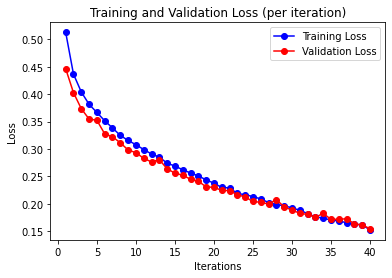

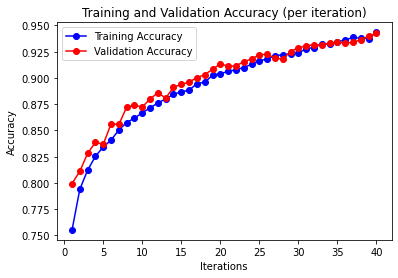

In [16]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from history.history
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
train_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']

# Get the number of iterations
num_iterations = len(train_loss)

# Create a list of iterations
iterations = range(1, num_iterations + 1)

# Plot the training and validation loss
plt.plot(iterations, train_loss, 'bo-', label='Training Loss')
plt.plot(iterations, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (per iteration)')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(iterations, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(iterations, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (per iteration)')
plt.legend()
plt.show()


In [3]:
#draw the schemantic of the model
from keras_sequential_ascii import keras2ascii
keras2ascii(modele)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         300
             Reshape     |   -------------------         0     0.0%
                       #####    300    1
              Conv1D    \|/  -------------------       128     0.0%
                relu   #####    298   32
        MaxPooling1D   Y max -------------------         0     0.0%
                       #####    149   32
             Flatten   ||||| -------------------         0     0.0%
                       #####        4768
               Dense   XXXXX -------------------    305216    99.9%
                relu   #####          64
             Dropout    | || -------------------         0     0.0%
                       #####          64
               Dense   XXXXX -------------------        65     0.0%
             sigmoid   #####           1


In [28]:
#modele = keras.models.load_model(path+"cnnfinal2128",custom_objects={'F1Score': F1Score})
results = modele.evaluate(val_x,val_y)

227/227 [==============================] - 13s 4ms/step - loss: 0.1526 - accuracy: 0.9438 - precision: 0.9357 - recall: 0.8922 - f1_score: 0.9134


In [8]:
#function to transform the hex data to int
def convert_to_int(chars):
    low_byte = int(chars[:2], 16)
    high_byte = int(chars[2:], 16)
    # Perform sign extension if the high byte is negative
    if high_byte & 0x80:
        high_byte -= 0x100
    # Combine the bytes and return the result
    return (high_byte << 8) | low_byte

In [5]:
#load our data
cir_los = np.load('184cirloswithdb.npy')
cir_wlos = np.load('184cirwloswithdb.npy')
cir_nlos = np.load('232cirloswithdbnlos.npy')
cir_nnlos = np.load('nlossecondcir.npy')

In [ ]:
#manipulate data so each sample is represented by the cir magnitude
import math
import statistics
def make_pred(FL):
    i=0
    sJ = [0]*300
    cirR = [0]*300
    cirI = [0]*300
    for j in range(0,300):     
        cirR[j] =  convert_to_int(FL[i:i+4])
        cirI[j] =  convert_to_int(FL[i+4:i+8])
        sJ[j]=j
        i = i+8 
    final = [0]*300
    for i in range(len(cirI)):
        cirI[i] *= cirI[i]
        cirR[i] *= cirR[i]
        final[i] = math.sqrt(cirR[i]+cirI[i])
    
    # Calculate the mean of the list
    
    mean = statistics.mean(final)
    

    # Calculate the standard deviation of the list
    std_dev = np.std(final)

    for i in range(len(cirI)):
        final[i] = (final[i] - mean)/std_dev        
    zero = np.array(final)
    return zero 

In [ ]:
#keep a number of samples from each category, so the set is balanced

testlos = cir_los[100:850]
testnlos = cir_nlos[5:505]
testwlos = cir_wlos[100:850]
testnnlos = cir_nnlos[305:1305]
test_real = np.append(testlos,testwlos,axis=0)
test_real = np.append(test_real,testnlos,axis=0)
test_real = np.append(test_real,testnnlos,axis=0)
print(test_real.shape)

In [ ]:
#make the labels for our dataset
label_los = np.array([0]*1500)
label_nlos = np.array([1]*1500)
labels = np.append(label_los,label_nlos,axis=0)
print(label.shape)
emptyz = np.empty(( 3000, 300))
for i in range(0,3000):
    emptyz[i] = make_pred(test_real[i])
    #create array of cir magnitude for our set

In [ ]:
#save training history of model
np.save('history2128.npy',history1.history)

In [24]:
#evaluate model performance in our dataset
hf = modele.evaluate(empty,label)

63/63 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9590 - precision: 0.9978 - recall: 0.9200 - f1_score: 0.9573    


In [25]:
#save cnn model
modele.save(path+"cnnfinal2128")

INFO:tensorflow:Assets written to: /home/alexander/Downloads/cnnfinal2128/assets


In [17]:
label_los = np.array([0]*1500)
label_nlos = np.array([1]*1500)
labels = np.append(label_los,label_nlos,axis=0)
print(label.shape)
emptyz = np.empty(( 3000, 300))
for i in range(0,3000):
    emptyz[i] = make_pred(test_real[i])
hn = modelyux.evaluate(emptyz,labels)  


(2000,)
94/94 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8493 - precision_18: 0.9943 - recall_18: 0.7027 - f1_score: 0.8234      


In [36]:
np.save('history2128.npy',history1.history)

In [73]:
#fc nn model
modelyux = tf.keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(300,)),
  layers.Dropout(0.5),  
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),  
  layers.Dense(64, activation='relu'),  
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5), 
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.5), 
  layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)),
  layers.Dense(1, activation='sigmoid')
])

# Compile your model
# Compile your model with the F1 score metric
modelyux.compile(optimizer=optimizer,
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score()])

In [75]:
history2 = modelyux.fit(train_x, train_y, epochs=20 ,batch_size=10, validation_data=(test_x, test_y))

Epoch 1/20
2202/2202 [==============================] - 8s 3ms/step - loss: 0.7187 - accuracy: 0.6526 - precision_20: 0.3069 - recall_20: 0.0256 - f1_score: 0.0473 - val_loss: 0.7073 - val_accuracy: 0.6599 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/20
2202/2202 [==============================] - 6s 3ms/step - loss: 0.6547 - accuracy: 0.6634 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.6696 - val_accuracy: 0.6599 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/20
2202/2202 [==============================] - 6s 3ms/step - loss: 0.6184 - accuracy: 0.6634 - precision_20: 0.0000e+00 - recall_20: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.6446 - val_accuracy: 0.6599 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/20
2202/2202 [==============================] - 6s 3ms/step - loss: 0.5930 - accuracy: 0.669

In [46]:
#evaluate on our dataset
f = modelyux.evaluate(emptyz,labels)

94/94 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8493 - precision_18: 0.9943 - recall_18: 0.7027 - f1_score: 0.8234    


In [76]:
#evaluate on testing dataset - testing set used as validation and vice versa
gg = modelyux.evaluate(val_x,val_y)

227/227 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.9019 - precision_18: 0.8509 - recall_18: 0.8545 - f1_score: 0.8527


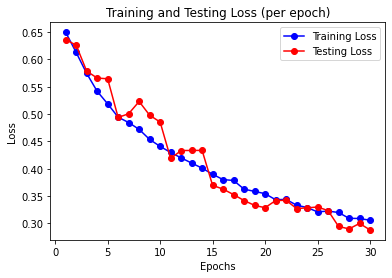

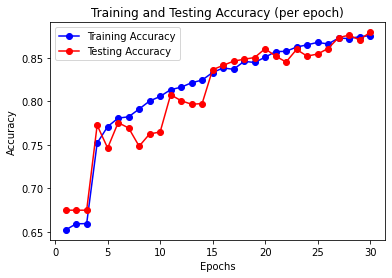

In [8]:
import matplotlib.pyplot as plt

train_loss = historykl['loss']
val_loss = historykl['val_loss']
train_accuracy = historykl['accuracy']
val_accuracy = historykl['val_accuracy']

# Get the number of iterations
num_iterations = len(train_loss)

# Create a list of iterations
iterations = range(1, num_iterations + 1)

# Plot the training and validation loss
plt.plot(iterations, train_loss, 'bo-', label='Training Loss')
plt.plot(iterations, val_loss, 'ro-', label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss (per epoch)')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(iterations, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(iterations, val_accuracy, 'ro-', label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy (per epoch)')
plt.legend()
plt.show()

In [78]:
modelyux.save(path+"fcnnfinal2128")
np.save('historyfcnn2128.npy',history2.history)

INFO:tensorflow:Assets written to: /home/alexander/Downloads/fcnnfinal2128/assets
